## Grouped Bar Chart

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def create_multi_csv_bar_chart(csv_files, x_labels_list, subplot_titles, 
                              figsize=(16, 6),
                              ylim=(0, 4), ylabel="Speedup"):
    """
    Creates multiple grouped bar charts from different CSV files with shared y-axis.
    
    Parameters:
    csv_files (list): List of CSV file paths, one for each subplot
    x_labels_list (list of lists): X-axis labels for each subplot
    subplot_titles (list): Title for each subplot  
    figsize (tuple): Figure size (width, height)
    title (str): Overall figure title
    ylim (tuple): Y-axis limits
    ylabel (str): Y-axis label
    
    Returns:
    matplotlib.figure.Figure: The created figure
    """

    legend_font = 32
    xlabel_font = 36
    ylabel_font = 38
    subtitle_font = 32
    
    num_plots = len(csv_files)
    
    # Calculate width ratios based on number of x-labels in each plot
    width_ratios = [len(labels) for labels in x_labels_list]
    
    # Create subplots with shared y-axis and better spacing
    fig, axes = plt.subplots(1, num_plots, figsize=figsize, sharey=True, 
                           gridspec_kw={'width_ratios': width_ratios, 'wspace': 0.0})
    
    # Ensure axes is always a list
    if num_plots == 1:
        axes = [axes]
    
    # Process each subplot with its own CSV file
    for i, (ax, csv_file, x_labels, subplot_title) in enumerate(zip(axes, csv_files, x_labels_list, subplot_titles)):
        
        # Read CSV data for this specific plot
        df = pd.read_csv(csv_file)
        
        # Extract and normalize data (using last row as baseline)

        cycles = df['static_coarse_cycles'].values 
        off_chip_traffic = df['static_interleave_cycles'].values 
        on_chip_requirement = df['dynamic_cycles'].values
        
        # Set up bar positions
        x = np.arange(len(x_labels))
        width = 0.25
        
        # Create bars (only show legend labels on first plot)
        bars1 = ax.bar(x - width, cycles, width, 
                      label='Static (Coarse)' if i == 0 else "", 
                      alpha=0.8, color='C0')
        bars2 = ax.bar(x, off_chip_traffic, width, 
                      label='Static (Interleave)' if i == 0 else "", 
                      alpha=0.8, color='C1')
        bars3 = ax.bar(x + width, on_chip_requirement, width, 
                      label='Dynamic' if i == 0 else "", 
                      alpha=0.8, color='C2')
        
        # Customize subplot
        ax.set_xticks(x)
        ax.set_xticklabels(x_labels, ha='center')
        ax.set_title(subplot_title, fontsize=subtitle_font, fontweight='bold')
        ax.grid(True, alpha=0.3, axis='y')
        ax.tick_params(axis='y', labelsize=ylabel_font)
        ax.tick_params(axis='x', labelsize=xlabel_font)
        
        # Only show y-label on leftmost plot
        if i == 0:
            ax.set_ylabel(ylabel, fontsize=xlabel_font)
            
        # Remove y-axis ticks and labels from non-leftmost plots for cleaner look
        if i > 0:
            ax.tick_params(axis='y', left=False, labelleft=False)
    
    # Set y-axis limits and formatting
    axes[0].set_ylim(ylim)
    axes[0].yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x:.1f}'))
    
    # Add overall title
    # fig.suptitle(title, fontsize=16, fontweight='bold', y=0.95)
    
    # Add legend (only once, positioned at top)
    if num_plots > 0:
        handles, labels = axes[0].get_legend_handles_labels()
        fig.legend(handles, labels, loc='upper right', bbox_to_anchor=(1.0, 0.92), 
                  ncol=1, fontsize=legend_font)
    
    plt.tight_layout()
    return fig


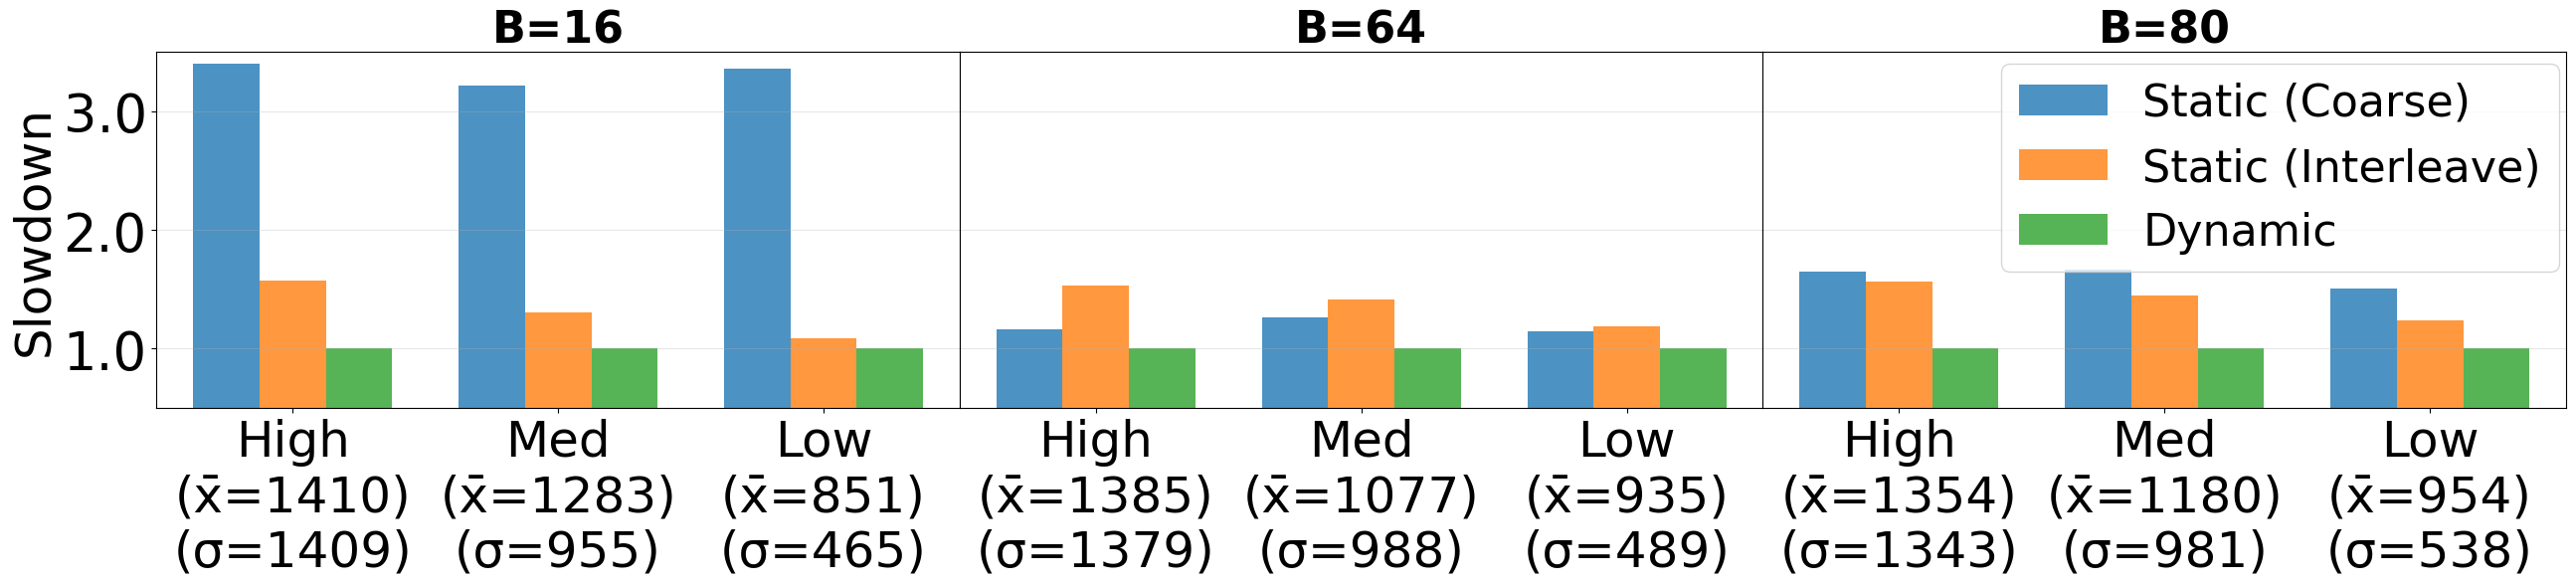

In [41]:

# Example 1: Different CSV files for each model/dataset combination
csv_files = [
    './dynamic_par/batch16_sweep_geomean_normalized.csv',  
    './dynamic_par/batch64_sweep_geomean_normalized.csv',  
    './dynamic_par/batch80_sweep_geomean_normalized.csv',    
]

x_labels_list = [
    ['High\n(x̄=1410)\n(σ=1409)','Med\n(x̄=1283)\n(σ=955)', 'Low\n(x̄=851)\n(σ=465)', ],
    ['High\n(x̄=1385)\n(σ=1379)','Med\n(x̄=1077)\n(σ=988)', 'Low\n(x̄=935)\n(σ=489)', ],
    ['High\n(x̄=1354)\n(σ=1343)','Med\n(x̄=1180)\n(σ=981)', 'Low\n(x̄=954)\n(σ=538)', ],
]

subplot_titles = [
    'B=16',
    'B=64', 
    'B=80', 
]

# Create the multi-plot chart
fig = create_multi_csv_bar_chart(
    csv_files=csv_files,figsize=(26, 6),
    x_labels_list=x_labels_list, 
    subplot_titles=subplot_titles,
    ylim=(0.5, 3.5),
    ylabel="Slowdown"
)

plt.show()


# You can also save the plots
# fig.savefig('./dyn_tiling/dyn_tile_b64.pdf', dpi=300, bbox_inches='tight')